In [104]:
# import libarries
import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import matplotlib
plt.style.use('ggplot')
from matplotlib.pyplot import figure

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8)  #Adjusts the configuration of the plots we will create

#Read in the data
df = pd.read_csv(r'C:\Data Analysis\Python Porfolio Project\movies.csv')
 

In [106]:
# let's look at the data, quick scan on the first few data list

df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0


In [108]:
# let's see if there is any missing data
for col in df.columns:
    pct_missing = np.mean(df[col].isnull())
    print('{} - {}%'.format(col,pct_missing))

# We found out there are missing values

name - 0.0%
rating - 0.010041731872717789%
genre - 0.0%
year - 0.0%
released - 0.0002608242044861763%
score - 0.0003912363067292645%
votes - 0.0003912363067292645%
director - 0.0%
writer - 0.0003912363067292645%
star - 0.00013041210224308815%
country - 0.0003912363067292645%
budget - 0.2831246739697444%
gross - 0.02464788732394366%
company - 0.002217005738132499%
runtime - 0.0005216484089723526%


In [110]:
#Find where the missing data at
for col in df.columns:
    print(df[col].isnull().value_counts(), "\n") 

name
False    7668
Name: count, dtype: int64 

rating
False    7591
True       77
Name: count, dtype: int64 

genre
False    7668
Name: count, dtype: int64 

year
False    7668
Name: count, dtype: int64 

released
False    7666
True        2
Name: count, dtype: int64 

score
False    7665
True        3
Name: count, dtype: int64 

votes
False    7665
True        3
Name: count, dtype: int64 

director
False    7668
Name: count, dtype: int64 

writer
False    7665
True        3
Name: count, dtype: int64 

star
False    7667
True        1
Name: count, dtype: int64 

country
False    7665
True        3
Name: count, dtype: int64 

budget
False    5497
True     2171
Name: count, dtype: int64 

gross
False    7479
True      189
Name: count, dtype: int64 

company
False    7651
True       17
Name: count, dtype: int64 

runtime
False    7664
True        4
Name: count, dtype: int64 



In [112]:
#fill in any missing data as 0, so there will be a value in it, not as null
df = df.fillna(0)

In [114]:
for col in df.columns:
    pct_missing = np.mean(df[col].isnull())
    print('{} - {}%'.format(col,pct_missing))

name - 0.0%
rating - 0.0%
genre - 0.0%
year - 0.0%
released - 0.0%
score - 0.0%
votes - 0.0%
director - 0.0%
writer - 0.0%
star - 0.0%
country - 0.0%
budget - 0.0%
gross - 0.0%
company - 0.0%
runtime - 0.0%


In [116]:
df.dtypes

name         object
rating       object
genre        object
year          int64
released     object
score       float64
votes       float64
director     object
writer       object
star         object
country      object
budget      float64
gross       float64
company      object
runtime     float64
dtype: object

In [118]:
# change data type of columns

df['budget'] = df['budget'].astype('Int64')

df['gross'] = df['gross'].astype('Int64') 

In [120]:
df.dtypes

name         object
rating       object
genre        object
year          int64
released     object
score       float64
votes       float64
director     object
writer       object
star         object
country      object
budget        Int64
gross         Int64
company      object
runtime     float64
dtype: object

In [122]:
df

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000,46998772,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000,58853106,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000,538375067,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000,83453539,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000,39846344,Orion Pictures,98.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7663,More to Life,0,Drama,2020,"October 23, 2020 (United States)",3.1,18.0,Joseph Ebanks,Joseph Ebanks,Shannon Bond,United States,7000,0,0,90.0
7664,Dream Round,0,Comedy,2020,"February 7, 2020 (United States)",4.7,36.0,Dusty Dukatz,Lisa Huston,Michael Saquella,United States,0,0,Cactus Blue Entertainment,90.0
7665,Saving Mbango,0,Drama,2020,"April 27, 2020 (Cameroon)",5.7,29.0,Nkanya Nkwai,Lynno Lovert,Onyama Laura,United States,58750,0,Embi Productions,0.0
7666,It's Just Us,0,Drama,2020,"October 1, 2020 (United States)",0.0,0.0,James Randall,James Randall,Christina Roz,United States,15000,0,0,120.0


In [124]:
# if we look closely to the 'year' and 'released', some of the year doesn't match to released.
# first we realized the 'released' column is type 'object', so we want it to be string, so we can take from it
# take a deeper look at the command of 'str.split'
df['year_corrected'] = df['released'].astype(str).str.split(',').str[1].str.split('(').str[0]

df

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,year_corrected
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000,46998772,Warner Bros.,146.0,1980
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000,58853106,Columbia Pictures,104.0,1980
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000,538375067,Lucasfilm,124.0,1980
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000,83453539,Paramount Pictures,88.0,1980
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000,39846344,Orion Pictures,98.0,1980
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7663,More to Life,0,Drama,2020,"October 23, 2020 (United States)",3.1,18.0,Joseph Ebanks,Joseph Ebanks,Shannon Bond,United States,7000,0,0,90.0,2020
7664,Dream Round,0,Comedy,2020,"February 7, 2020 (United States)",4.7,36.0,Dusty Dukatz,Lisa Huston,Michael Saquella,United States,0,0,Cactus Blue Entertainment,90.0,2020
7665,Saving Mbango,0,Drama,2020,"April 27, 2020 (Cameroon)",5.7,29.0,Nkanya Nkwai,Lynno Lovert,Onyama Laura,United States,58750,0,Embi Productions,0.0,2020
7666,It's Just Us,0,Drama,2020,"October 1, 2020 (United States)",0.0,0.0,James Randall,James Randall,Christina Roz,United States,15000,0,0,120.0,2020


In [126]:
# sort the gross to descending order
df.sort_values(by=['gross'], inplace = False, ascending = False)

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,year_corrected
5445,Avatar,PG-13,Action,2009,"December 18, 2009 (United States)",7.8,1100000.0,James Cameron,James Cameron,Sam Worthington,United States,237000000,2847246203,Twentieth Century Fox,162.0,2009
7445,Avengers: Endgame,PG-13,Action,2019,"April 26, 2019 (United States)",8.4,903000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,356000000,2797501328,Marvel Studios,181.0,2019
3045,Titanic,PG-13,Drama,1997,"December 19, 1997 (United States)",7.8,1100000.0,James Cameron,James Cameron,Leonardo DiCaprio,United States,200000000,2201647264,Twentieth Century Fox,194.0,1997
6663,Star Wars: Episode VII - The Force Awakens,PG-13,Action,2015,"December 18, 2015 (United States)",7.8,876000.0,J.J. Abrams,Lawrence Kasdan,Daisy Ridley,United States,245000000,2069521700,Lucasfilm,138.0,2015
7244,Avengers: Infinity War,PG-13,Action,2018,"April 27, 2018 (United States)",8.4,897000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,321000000,2048359754,Marvel Studios,149.0,2018
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1617,Mortal Passions,R,Crime,1989,"January 26, 1990 (United States)",4.5,274.0,Andrew Lane,Alan Moskowitz,Zach Galligan,United States,0,0,Gibraltar Entertainment,92.0,1990
1614,Edge of Sanity,R,Horror,1989,"April 14, 1989 (United States)",5.2,1300.0,Gérard Kikoïne,J.P. Félix,Anthony Perkins,United Kingdom,0,0,Allied Vision,85.0,1989
1606,"I, Madman",R,Fantasy,1989,"April 7, 1989 (United States)",6.0,2900.0,Tibor Takács,David Chaskin,Jenny Wright,Canada,0,0,Trans World Entertainment (TWE),89.0,1989
1601,My Twentieth Century,0,Comedy,1989,"January 13, 1990 (Japan)",7.1,1500.0,Ildikó Enyedi,Ildikó Enyedi,Dorota Segda,Hungary,0,0,Budapest Stúdió Vállalat,104.0,1990


In [128]:
#pd.set_option('display.max_rows', None)

#if I want to see the full list of data, set display rows as max

In [130]:
df.sort_values(by=['gross'], inplace = False, ascending = False)

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,year_corrected
5445,Avatar,PG-13,Action,2009,"December 18, 2009 (United States)",7.8,1100000.0,James Cameron,James Cameron,Sam Worthington,United States,237000000,2847246203,Twentieth Century Fox,162.0,2009
7445,Avengers: Endgame,PG-13,Action,2019,"April 26, 2019 (United States)",8.4,903000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,356000000,2797501328,Marvel Studios,181.0,2019
3045,Titanic,PG-13,Drama,1997,"December 19, 1997 (United States)",7.8,1100000.0,James Cameron,James Cameron,Leonardo DiCaprio,United States,200000000,2201647264,Twentieth Century Fox,194.0,1997
6663,Star Wars: Episode VII - The Force Awakens,PG-13,Action,2015,"December 18, 2015 (United States)",7.8,876000.0,J.J. Abrams,Lawrence Kasdan,Daisy Ridley,United States,245000000,2069521700,Lucasfilm,138.0,2015
7244,Avengers: Infinity War,PG-13,Action,2018,"April 27, 2018 (United States)",8.4,897000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,321000000,2048359754,Marvel Studios,149.0,2018
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1617,Mortal Passions,R,Crime,1989,"January 26, 1990 (United States)",4.5,274.0,Andrew Lane,Alan Moskowitz,Zach Galligan,United States,0,0,Gibraltar Entertainment,92.0,1990
1614,Edge of Sanity,R,Horror,1989,"April 14, 1989 (United States)",5.2,1300.0,Gérard Kikoïne,J.P. Félix,Anthony Perkins,United Kingdom,0,0,Allied Vision,85.0,1989
1606,"I, Madman",R,Fantasy,1989,"April 7, 1989 (United States)",6.0,2900.0,Tibor Takács,David Chaskin,Jenny Wright,Canada,0,0,Trans World Entertainment (TWE),89.0,1989
1601,My Twentieth Century,0,Comedy,1989,"January 13, 1990 (Japan)",7.1,1500.0,Ildikó Enyedi,Ildikó Enyedi,Dorota Segda,Hungary,0,0,Budapest Stúdió Vállalat,104.0,1990


In [132]:
# rearrange the coulumns 

reordered = ['budget','company','country','director','genre','gross','name','rating','released','runtime','score','star','votes','writer','year','year_corrected']

df = df.reindex(columns = reordered)

df

,budget,company,country,director,genre,gross,name,rating,released,runtime,score,star,votes,writer,year,year_corrected
0,19000000,Warner Bros.,United Kingdom,Stanley Kubrick,Drama,46998772,The Shining,R,"June 13, 1980 (United States)",146.0,8.4,Jack Nicholson,927000.0,Stephen King,1980,1980
1,4500000,Columbia Pictures,United States,Randal Kleiser,Adventure,58853106,The Blue Lagoon,R,"July 2, 1980 (United States)",104.0,5.8,Brooke Shields,65000.0,Henry De Vere Stacpoole,1980,1980
2,18000000,Lucasfilm,United States,Irvin Kershner,Action,538375067,Star Wars: Episode V - The Empire Strikes Back,PG,"June 20, 1980 (United States)",124.0,8.7,Mark Hamill,1200000.0,Leigh Brackett,1980,1980
3,3500000,Paramount Pictures,United States,Jim Abrahams,Comedy,83453539,Airplane!,PG,"July 2, 1980 (United States)",88.0,7.7,Robert Hays,221000.0,Jim Abrahams,1980,1980
4,6000000,Orion Pictures,United States,Harold Ramis,Comedy,39846344,Caddyshack,R,"July 25, 1980 (United States)",98.0,7.3,Chevy Chase,108000.0,Brian Doyle-Murray,1980,1980
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7663,7000,0,United States,Joseph Ebanks,Drama,0,More to Life,0,"October 23, 2020 (United States)",90.0,3.1,Shannon Bond,18.0,Joseph Ebanks,2020,2020
7664,0,Cactus Blue Entertainment,United States,Dusty Dukatz,Comedy,0,Dream Round,0,"February 7, 2020 (United States)",90.0,4.7,Michael Saquella,36.0,Lisa Huston,2020,2020
7665,58750,Embi Productions,United States,Nkanya Nkwai,Drama,0,Saving Mbango,0,"April 27, 2020 (Cameroon)",0.0,5.7,Onyama Laura,29.0,Lynno Lovert,2020,2020
7666,15000,0,United States,James Randall,Drama,0,It's Just Us,0,"October 1, 2020 (United States)",120.0,0.0,Christina Roz,0.0,James Randall,2020,2020


In [134]:
df['company'] = df['company'].astype('str')

In [136]:
df.dtypes

budget              Int64
company            object
country            object
director           object
genre              object
gross               Int64
name               object
rating             object
released           object
runtime           float64
score             float64
star               object
votes             float64
writer             object
year                int64
year_corrected     object
dtype: object

In [138]:
df['company'].sort_values(ascending = False)

7129                                thefyzz
5664                            micro_scope
6412               iDeal Partners Film Fund
4007                               i5 Films
6793                             i am OTHER
                       ...                 
969                                       0
1033                                      0
3024                        .406 Production
7525    "Weathering With You" Film Partners
4345        "DIA" Productions GmbH & Co. KG
Name: company, Length: 7668, dtype: object

In [140]:
# drop any duplicates

# for example, if i want to drop any duplicated values in 'company' and sort in a desecnding order, the code it below

# df['company'].drop_duplicates().sort_values(ascending = False)

In [142]:
# for this case, we want it to drop any duplicated values across the dataframe

df.drop_duplicates()

,budget,company,country,director,genre,gross,name,rating,released,runtime,score,star,votes,writer,year,year_corrected
0,19000000,Warner Bros.,United Kingdom,Stanley Kubrick,Drama,46998772,The Shining,R,"June 13, 1980 (United States)",146.0,8.4,Jack Nicholson,927000.0,Stephen King,1980,1980
1,4500000,Columbia Pictures,United States,Randal Kleiser,Adventure,58853106,The Blue Lagoon,R,"July 2, 1980 (United States)",104.0,5.8,Brooke Shields,65000.0,Henry De Vere Stacpoole,1980,1980
2,18000000,Lucasfilm,United States,Irvin Kershner,Action,538375067,Star Wars: Episode V - The Empire Strikes Back,PG,"June 20, 1980 (United States)",124.0,8.7,Mark Hamill,1200000.0,Leigh Brackett,1980,1980
3,3500000,Paramount Pictures,United States,Jim Abrahams,Comedy,83453539,Airplane!,PG,"July 2, 1980 (United States)",88.0,7.7,Robert Hays,221000.0,Jim Abrahams,1980,1980
4,6000000,Orion Pictures,United States,Harold Ramis,Comedy,39846344,Caddyshack,R,"July 25, 1980 (United States)",98.0,7.3,Chevy Chase,108000.0,Brian Doyle-Murray,1980,1980
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7663,7000,0,United States,Joseph Ebanks,Drama,0,More to Life,0,"October 23, 2020 (United States)",90.0,3.1,Shannon Bond,18.0,Joseph Ebanks,2020,2020
7664,0,Cactus Blue Entertainment,United States,Dusty Dukatz,Comedy,0,Dream Round,0,"February 7, 2020 (United States)",90.0,4.7,Michael Saquella,36.0,Lisa Huston,2020,2020
7665,58750,Embi Productions,United States,Nkanya Nkwai,Drama,0,Saving Mbango,0,"April 27, 2020 (Cameroon)",0.0,5.7,Onyama Laura,29.0,Lynno Lovert,2020,2020
7666,15000,0,United States,James Randall,Drama,0,It's Just Us,0,"October 1, 2020 (United States)",120.0,0.0,Christina Roz,0.0,James Randall,2020,2020


In [144]:
df

,budget,company,country,director,genre,gross,name,rating,released,runtime,score,star,votes,writer,year,year_corrected
0,19000000,Warner Bros.,United Kingdom,Stanley Kubrick,Drama,46998772,The Shining,R,"June 13, 1980 (United States)",146.0,8.4,Jack Nicholson,927000.0,Stephen King,1980,1980
1,4500000,Columbia Pictures,United States,Randal Kleiser,Adventure,58853106,The Blue Lagoon,R,"July 2, 1980 (United States)",104.0,5.8,Brooke Shields,65000.0,Henry De Vere Stacpoole,1980,1980
2,18000000,Lucasfilm,United States,Irvin Kershner,Action,538375067,Star Wars: Episode V - The Empire Strikes Back,PG,"June 20, 1980 (United States)",124.0,8.7,Mark Hamill,1200000.0,Leigh Brackett,1980,1980
3,3500000,Paramount Pictures,United States,Jim Abrahams,Comedy,83453539,Airplane!,PG,"July 2, 1980 (United States)",88.0,7.7,Robert Hays,221000.0,Jim Abrahams,1980,1980
4,6000000,Orion Pictures,United States,Harold Ramis,Comedy,39846344,Caddyshack,R,"July 25, 1980 (United States)",98.0,7.3,Chevy Chase,108000.0,Brian Doyle-Murray,1980,1980
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7663,7000,0,United States,Joseph Ebanks,Drama,0,More to Life,0,"October 23, 2020 (United States)",90.0,3.1,Shannon Bond,18.0,Joseph Ebanks,2020,2020
7664,0,Cactus Blue Entertainment,United States,Dusty Dukatz,Comedy,0,Dream Round,0,"February 7, 2020 (United States)",90.0,4.7,Michael Saquella,36.0,Lisa Huston,2020,2020
7665,58750,Embi Productions,United States,Nkanya Nkwai,Drama,0,Saving Mbango,0,"April 27, 2020 (Cameroon)",0.0,5.7,Onyama Laura,29.0,Lynno Lovert,2020,2020
7666,15000,0,United States,James Randall,Drama,0,It's Just Us,0,"October 1, 2020 (United States)",120.0,0.0,Christina Roz,0.0,James Randall,2020,2020


In [146]:
# Budget has high correlation 
# Companies have high correlation

In [148]:
df = df.sort_values(by=['gross'], inplace = False, ascending = False)

In [150]:
df.head()

,budget,company,country,director,genre,gross,name,rating,released,runtime,score,star,votes,writer,year,year_corrected
5445,237000000,Twentieth Century Fox,United States,James Cameron,Action,2847246203,Avatar,PG-13,"December 18, 2009 (United States)",162.0,7.8,Sam Worthington,1100000.0,James Cameron,2009,2009
7445,356000000,Marvel Studios,United States,Anthony Russo,Action,2797501328,Avengers: Endgame,PG-13,"April 26, 2019 (United States)",181.0,8.4,Robert Downey Jr.,903000.0,Christopher Markus,2019,2019
3045,200000000,Twentieth Century Fox,United States,James Cameron,Drama,2201647264,Titanic,PG-13,"December 19, 1997 (United States)",194.0,7.8,Leonardo DiCaprio,1100000.0,James Cameron,1997,1997
6663,245000000,Lucasfilm,United States,J.J. Abrams,Action,2069521700,Star Wars: Episode VII - The Force Awakens,PG-13,"December 18, 2015 (United States)",138.0,7.8,Daisy Ridley,876000.0,Lawrence Kasdan,2015,2015
7244,321000000,Marvel Studios,United States,Anthony Russo,Action,2048359754,Avengers: Infinity War,PG-13,"April 27, 2018 (United States)",149.0,8.4,Robert Downey Jr.,897000.0,Christopher Markus,2018,2018


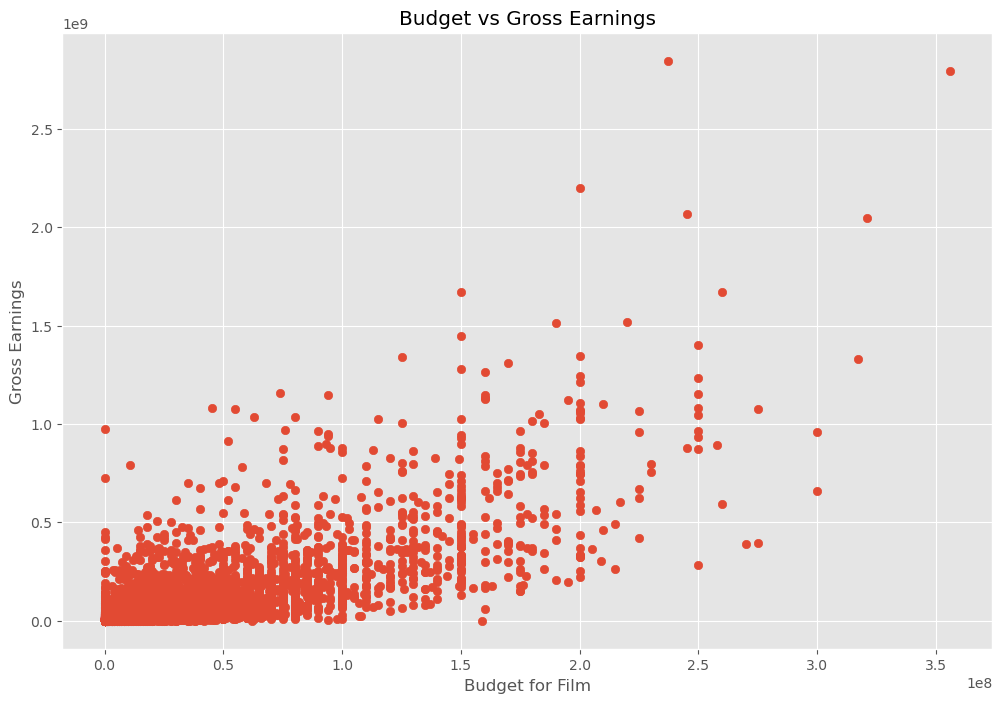

In [152]:
#scatter plot with budget verse gross

plt.scatter(x=df['budget'], y=df['gross'])

plt.title('Budget vs Gross Earnings')
plt.xlabel('Budget for Film')
plt.ylabel('Gross Earnings')

plt.show()

<Axes: xlabel='budget', ylabel='gross'>

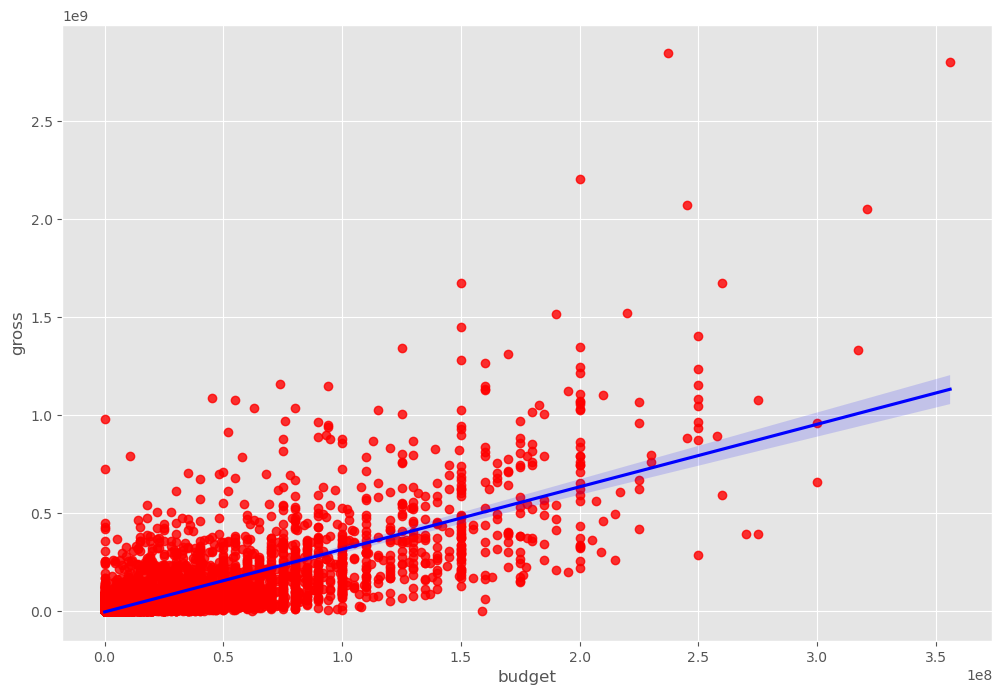

In [154]:
# Plot budget vs Gross using seaborn

sns.regplot(x='budget', y='gross', data = df, scatter_kws={"color" : "red"}, line_kws={"color" : "blue"})

In [156]:
# Let's start looking at correlation
# There are three methods of correlation(pearson, kendall, spearman)

df.corr(numeric_only = True)

,budget,gross,runtime,score,votes,year
budget,1.000000,0.750157,0.268372,0.056863,0.486931,0.309212
gross,0.750157,1.000000,0.244339,0.186012,0.632870,0.261900
runtime,0.268372,0.244339,1.000000,0.394564,0.306984,0.116358
score,0.056863,0.186012,0.394564,1.000000,0.407101,0.092616
votes,0.486931,0.632870,0.306984,0.407101,1.000000,0.222427
year,0.309212,0.261900,0.116358,0.092616,0.222427,1.000000


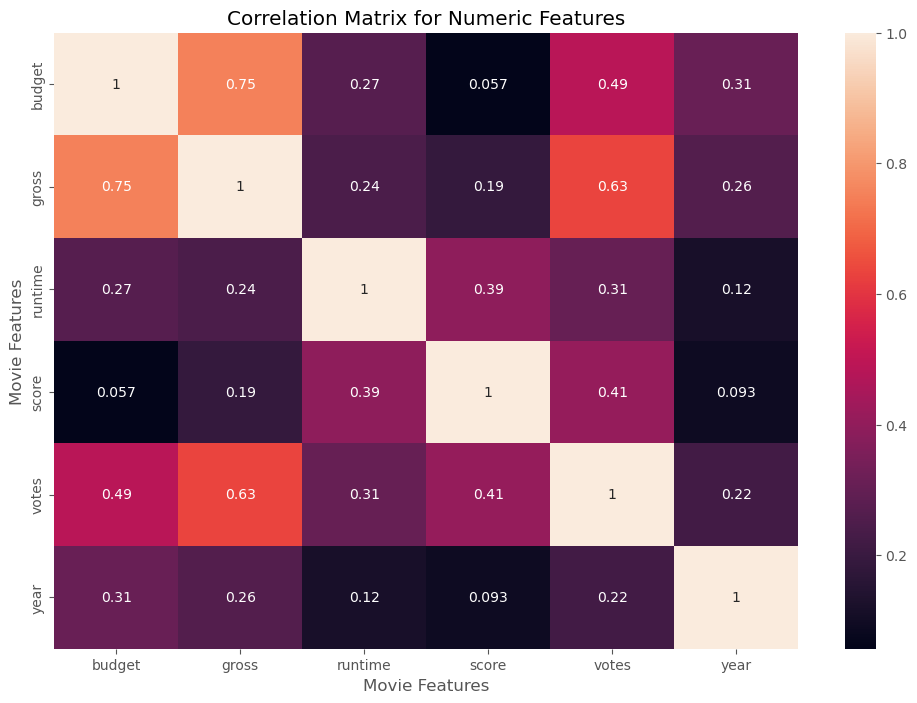

In [158]:
correlation_matrix = df.corr(method= 'pearson', numeric_only = True)

sns.heatmap(correlation_matrix, annot = True)

plt.title('Correlation Matrix for Numeric Features')
plt.xlabel('Movie Features')
plt.ylabel('Movie Features')

plt.show()

In [160]:
# look at company

df.head()

,budget,company,country,director,genre,gross,name,rating,released,runtime,score,star,votes,writer,year,year_corrected
5445,237000000,Twentieth Century Fox,United States,James Cameron,Action,2847246203,Avatar,PG-13,"December 18, 2009 (United States)",162.0,7.8,Sam Worthington,1100000.0,James Cameron,2009,2009
7445,356000000,Marvel Studios,United States,Anthony Russo,Action,2797501328,Avengers: Endgame,PG-13,"April 26, 2019 (United States)",181.0,8.4,Robert Downey Jr.,903000.0,Christopher Markus,2019,2019
3045,200000000,Twentieth Century Fox,United States,James Cameron,Drama,2201647264,Titanic,PG-13,"December 19, 1997 (United States)",194.0,7.8,Leonardo DiCaprio,1100000.0,James Cameron,1997,1997
6663,245000000,Lucasfilm,United States,J.J. Abrams,Action,2069521700,Star Wars: Episode VII - The Force Awakens,PG-13,"December 18, 2015 (United States)",138.0,7.8,Daisy Ridley,876000.0,Lawrence Kasdan,2015,2015
7244,321000000,Marvel Studios,United States,Anthony Russo,Action,2048359754,Avengers: Infinity War,PG-13,"April 27, 2018 (United States)",149.0,8.4,Robert Downey Jr.,897000.0,Christopher Markus,2018,2018


In [162]:
df_numerized = df.copy()

for col_name in df_numerized.columns:
    if(df_numerized[col_name].dtype == 'object'):
        df_numerized[col_name] = df_numerized[col_name].astype('category')
        df_numerized[col_name] = df_numerized[col_name].cat.codes

df_numerized

,budget,company,country,director,genre,gross,name,rating,released,runtime,score,star,votes,writer,year,year_corrected
5445,237000000,2254,56,1155,0,2847246203,533,6,697,162.0,7.8,2335,1100000.0,1779,2009,29
7445,356000000,1607,56,162,0,2797501328,535,6,184,181.0,8.4,2242,903000.0,744,2019,39
3045,200000000,2254,56,1155,6,2201647264,6896,6,705,194.0,7.8,1596,1100000.0,1779,1997,17
6663,245000000,1541,56,1125,0,2069521700,5144,6,699,138.0,7.8,525,876000.0,2551,2015,35
7244,321000000,1607,56,162,0,2048359754,536,6,193,149.0,8.4,2242,897000.0,744,2018,38
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1617,0,1160,56,117,5,0,3712,7,1278,92.0,4.5,2798,274.0,83,1989,10
1614,0,147,55,1033,10,0,1745,7,56,85.0,5.2,167,1300.0,1744,1989,9
1606,0,2238,7,2743,8,0,2691,7,258,89.0,6.0,1196,2900.0,947,1989,9
1601,0,505,19,1105,4,0,3836,0,1161,104.0,7.1,682,1500.0,1697,1989,10


In [164]:
df

,budget,company,country,director,genre,gross,name,rating,released,runtime,score,star,votes,writer,year,year_corrected
5445,237000000,Twentieth Century Fox,United States,James Cameron,Action,2847246203,Avatar,PG-13,"December 18, 2009 (United States)",162.0,7.8,Sam Worthington,1100000.0,James Cameron,2009,2009
7445,356000000,Marvel Studios,United States,Anthony Russo,Action,2797501328,Avengers: Endgame,PG-13,"April 26, 2019 (United States)",181.0,8.4,Robert Downey Jr.,903000.0,Christopher Markus,2019,2019
3045,200000000,Twentieth Century Fox,United States,James Cameron,Drama,2201647264,Titanic,PG-13,"December 19, 1997 (United States)",194.0,7.8,Leonardo DiCaprio,1100000.0,James Cameron,1997,1997
6663,245000000,Lucasfilm,United States,J.J. Abrams,Action,2069521700,Star Wars: Episode VII - The Force Awakens,PG-13,"December 18, 2015 (United States)",138.0,7.8,Daisy Ridley,876000.0,Lawrence Kasdan,2015,2015
7244,321000000,Marvel Studios,United States,Anthony Russo,Action,2048359754,Avengers: Infinity War,PG-13,"April 27, 2018 (United States)",149.0,8.4,Robert Downey Jr.,897000.0,Christopher Markus,2018,2018
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1617,0,Gibraltar Entertainment,United States,Andrew Lane,Crime,0,Mortal Passions,R,"January 26, 1990 (United States)",92.0,4.5,Zach Galligan,274.0,Alan Moskowitz,1989,1990
1614,0,Allied Vision,United Kingdom,Gérard Kikoïne,Horror,0,Edge of Sanity,R,"April 14, 1989 (United States)",85.0,5.2,Anthony Perkins,1300.0,J.P. Félix,1989,1989
1606,0,Trans World Entertainment (TWE),Canada,Tibor Takács,Fantasy,0,"I, Madman",R,"April 7, 1989 (United States)",89.0,6.0,Jenny Wright,2900.0,David Chaskin,1989,1989
1601,0,Budapest Stúdió Vállalat,Hungary,Ildikó Enyedi,Comedy,0,My Twentieth Century,0,"January 13, 1990 (Japan)",104.0,7.1,Dorota Segda,1500.0,Ildikó Enyedi,1989,1990


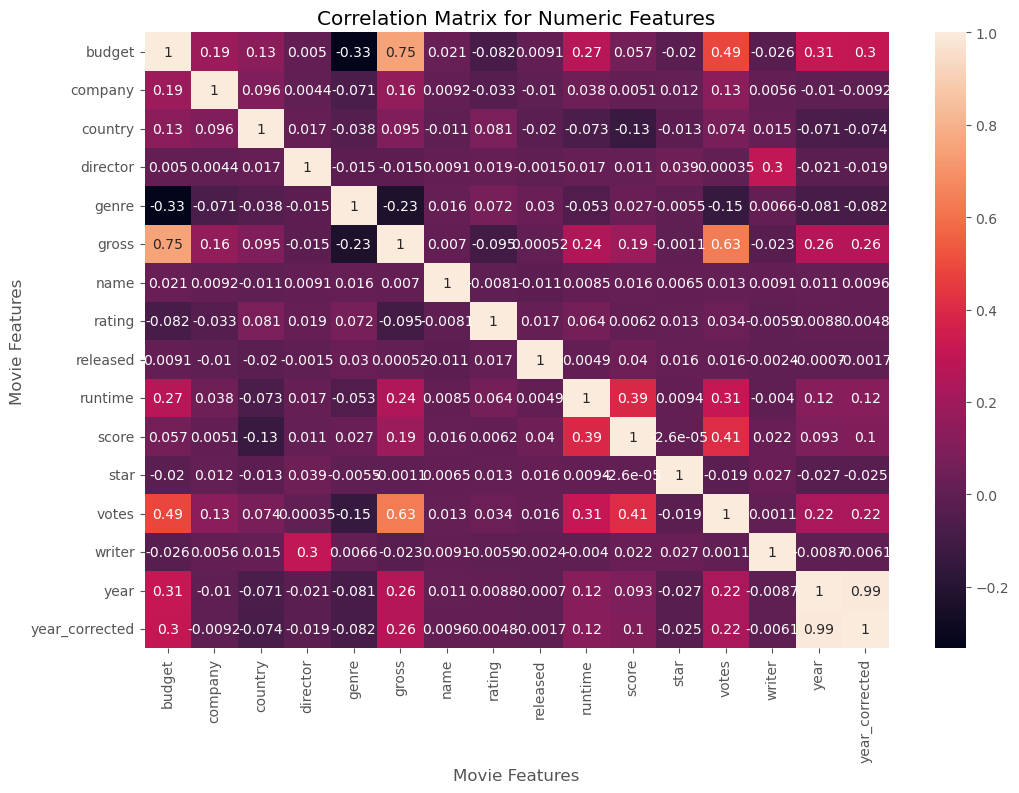

In [166]:
correlation_matrix = df_numerized.corr(method= 'pearson', numeric_only = True)

sns.heatmap(correlation_matrix, annot = True)

plt.title('Correlation Matrix for Numeric Features')
plt.xlabel('Movie Features')
plt.ylabel('Movie Features')

plt.show()

In [168]:
df_numerized.corr()

,budget,company,country,director,genre,gross,name,rating,released,runtime,score,star,votes,writer,year,year_corrected
budget,1.000000,0.186472,0.131720,0.004976,-0.334021,0.750157,0.020548,-0.081939,0.009145,0.268372,0.056863,-0.019952,0.486931,-0.025911,0.309212,0.302266
company,0.186472,1.000000,0.095546,0.004404,-0.071066,0.156743,0.009212,-0.032954,-0.010471,0.037527,0.005067,0.012437,0.133455,0.005644,-0.010433,-0.009190
country,0.131720,0.095546,1.000000,0.017490,-0.037615,0.095325,-0.010737,0.081244,-0.020427,-0.073319,-0.133346,-0.012998,0.073525,0.015343,-0.070938,-0.074166
director,0.004976,0.004404,0.017490,1.000000,-0.015258,-0.014916,0.009079,0.019483,-0.001478,0.017062,0.010568,0.039234,0.000349,0.299067,-0.020795,-0.018620
genre,-0.334021,-0.071066,-0.037615,-0.015258,1.000000,-0.234297,0.016355,0.072423,0.029822,-0.052914,0.027384,-0.005477,-0.145296,0.006567,-0.081261,-0.082070
gross,0.750157,0.156743,0.095325,-0.014916,-0.234297,1.000000,0.006989,-0.095450,0.000519,0.244339,0.186012,-0.001129,0.632870,-0.022997,0.261900,0.256266
name,0.020548,0.009212,-0.010737,0.009079,0.016355,0.006989,1.000000,-0.008069,-0.011311,0.008483,0.016377,0.006472,0.013038,0.009081,0.011453,0.009553
rating,-0.081939,-0.032954,0.081244,0.019483,0.072423,-0.095450,-0.008069,1.000000,0.016613,0.064133,0.006192,0.013405,0.033743,-0.005921,0.008779,0.004829
released,0.009145,-0.010471,-0.020427,-0.001478,0.029822,0.000519,-0.011311,0.016613,1.000000,0.004852,0.039814,0.015777,0.015878,-0.002404,-0.000695,-0.001653
runtime,0.268372,0.037527,-0.073319,0.017062,-0.052914,0.244339,0.008483,0.064133,0.004852,1.000000,0.394564,0.009418,0.306984,-0.004036,0.116358,0.121206


In [170]:
correlation_mat = df_numerized.corr()
corr_pairs = correlation_mat.unstack()
corr_pairs

budget          budget            1.000000
                company           0.186472
                country           0.131720
                director          0.004976
                genre            -0.334021
                                    ...   
year_corrected  star             -0.025288
                votes             0.219448
                writer           -0.006134
                year              0.992136
                year_corrected    1.000000
Length: 256, dtype: float64

In [172]:
sorted_pairs = corr_pairs.sort_values()

sorted_pairs



genre           budget           -0.334021
budget          genre            -0.334021
genre           gross            -0.234297
gross           genre            -0.234297
votes           genre            -0.145296
                                    ...   
director        director          1.000000
country         country           1.000000
company         company           1.000000
year            year              1.000000
year_corrected  year_corrected    1.000000
Length: 256, dtype: float64

In [174]:
high_corr = sorted_pairs[(sorted_pairs) >= 0.5]
high_corr

gross           votes             0.632870
votes           gross             0.632870
budget          gross             0.750157
gross           budget            0.750157
year_corrected  year              0.992136
year            year_corrected    0.992136
budget          budget            1.000000
writer          writer            1.000000
votes           votes             1.000000
star            star              1.000000
score           score             1.000000
runtime         runtime           1.000000
released        released          1.000000
rating          rating            1.000000
name            name              1.000000
gross           gross             1.000000
genre           genre             1.000000
director        director          1.000000
country         country           1.000000
company         company           1.000000
year            year              1.000000
year_corrected  year_corrected    1.000000
dtype: float64

In [ ]:
# in conclusion, we found out votes and budget have the highet correlation to gross earnings

# Company has low correlation